In [2]:
data_dir = '../../kleat/'
c2g_bam_file = os.path.join(data_dir, './benchmark_transcriptome/UHRC1/c2g.sorted.bam')
r2c_bam_file = os.path.join(data_dir, './benchmark_transcriptome/UHRC1/r2c_sorted.bam')

In [5]:
    run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t E2.L.2076 -s chr2 -l 21224600

2018-07-26 12:27:28,574|INFO|c2g_bam_file: ../../kleat/./benchmark_transcriptome/UHRC1/c2g.sorted.bam
2018-07-26 12:27:28,575|INFO|r2g_bam_file: ../../kleat/./benchmark_transcriptome/UHRC1/r2c_sorted.bam
31220it [00:00, 311680.87it/s]
2018-07-26 12:27:28,755|INFO|contig.query_name: E2.L.2076
2018-07-26 12:27:28,756|INFO|contig.is_reverse: True
2018-07-26 12:27:28,756|INFO|contig.cigarstring: 2031M934N184M108N115M404N7572M508N374M914N146M479N188M109N176M893N211M2342N122M609N183M2925N212M482N168M1240N192M1663N177M863N238M261N212M1100N147M112N118M2338N228M717N220M1297N86M682N125M1391N156M702N154M2826N146M1277N116M1036N39M312N182M
2018-07-26 12:27:28,757|INFO|contig.reference_start: 21224175
2018-07-26 12:27:28,757|INFO|contig.reference_end: 21266917
2018-07-26 12:27:30,446|INFO|collected 23 reads aligned to for E2.L.2076 (use --plot-all-reads to plot all reads)


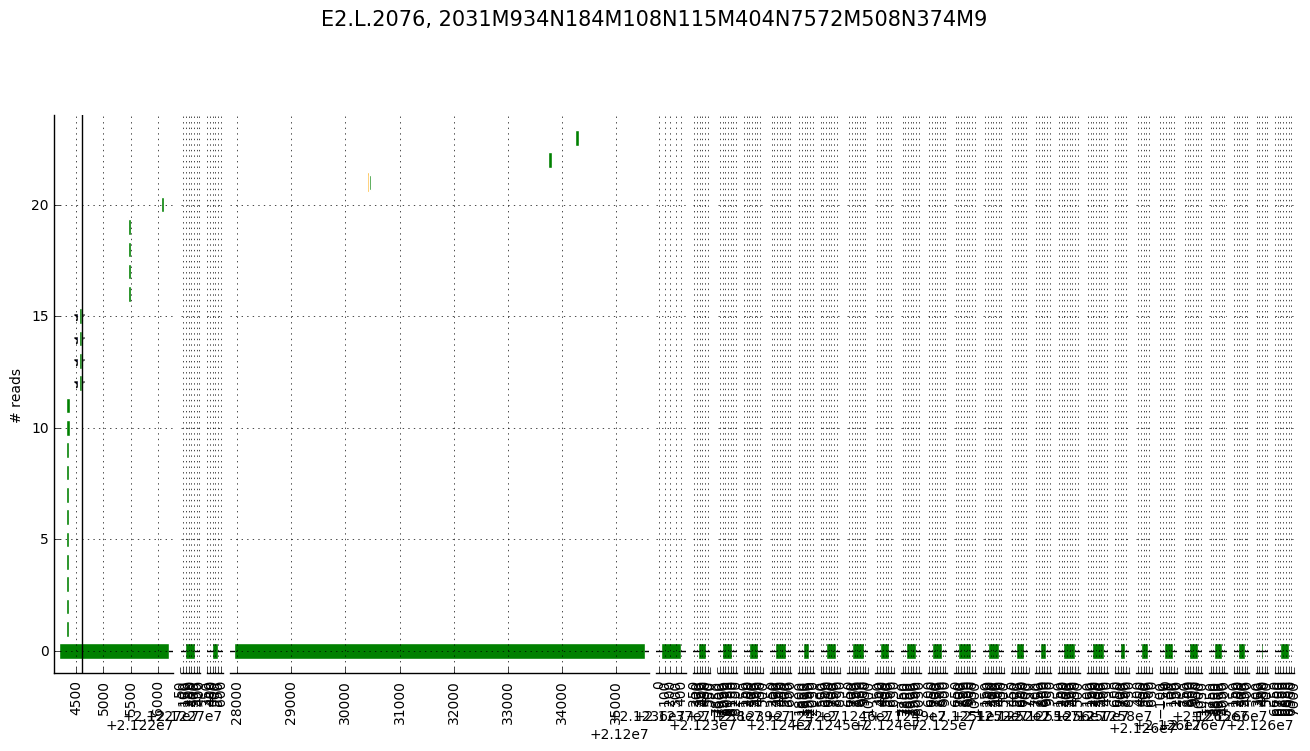

In [6]:
Image('./chr2_E2.L.2076_21224600.png')

In [6]:
adf = pd.read_csv('../test-on-UHRC1.tsv', keep_default_na=False, sep='\t')

In [19]:
adf.shape

(870121, 31)

In [8]:
bdf = adf.query('evidence_type == "suffix"')

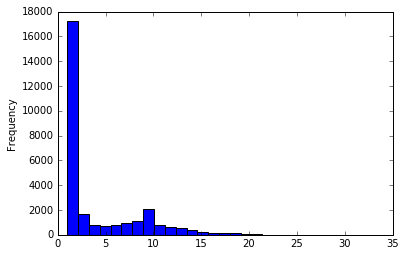

In [9]:
bdf.max_suffix_contig_tail_len.plot.hist(bins=30)

In [11]:
bdf.max_suffix_read_tail_len.value_counts()

0     28484
11    2    
2     2    
10    1    
3     1    
Name: max_suffix_read_tail_len, dtype: int64

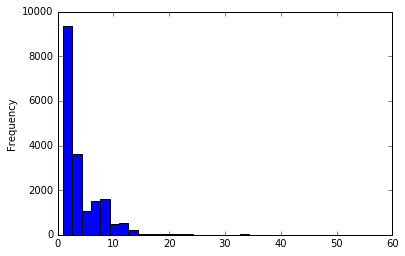

In [15]:
adf.query('evidence_type == "bridge"').max_bridge_read_tail_len.plot.hist(bins=30)

In [16]:
adf.query('evidence_type == "suffix"').sort_values('num_suffix_reads', ascending=False).head(5)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
838545,chrM,-,6939,7445,MT-TS1,ENSG00000210151,-506,suffix,E0.L.62257@1,182,40,False,1,0,0,0,1,2,0,0,2,0,1,AATACA,9,6976,37,AATACA,9,6976,37
863027,chrX,-,100182629,100169288,XKRX,ENSG00000182489,13341,suffix,01.U.1047190@27,75,40,False,1,0,0,0,1,1,0,0,10,0,27,TTTAAA,3,100182649,20,TTTAAA,3,100182647,18
409295,chr19,-,38871551,38874905,GGN,ENSG00000179168,-3354,suffix,01.L.378998@1,430,40,False,1,0,0,0,1,1,0,0,11,0,1,NA,-1,-1,-1,NA,-1,-1,-1
651508,chr5,-,20983644,20830274,RP11-697E23.1,ENSG00000248308,153370,suffix,01.U.1078596@2,75,2,False,1,0,0,0,1,1,0,0,3,0,2,AAAAAG,7,20983659,15,AAAAAG,7,20983659,15
482086,chr2,-,224839869,224839869,SERPINE2,ENSG00000135919,0,suffix,E1.L.16861@10|E3.L.60@9,2127,40,False,2,0,0,0,2,1,0,0,2,0,10,AATAAA,16,224839897,28,AATAAA,16,224839874,5


In [7]:
adf.query('evidence_type == "suffix"').sort_values('max_suffix_read_tail_len', ascending=False).head(5)

,seqname,strand,clv,aclv,gene_name,gene_id,signed_dist_to_aclv,evidence_type,contig_ids_at_pos,max_contig_len,max_contig_mapq,any_contig_is_hardclipped,num_suffix_contigs,num_bridge_contigs,num_link_contigs,num_blank_contigs,num_total_contigs,num_suffix_reads,num_bridge_reads,num_link_reads,max_suffix_read_tail_len,max_bridge_read_tail_len,max_suffix_contig_tail_len,ctg_hex,ctg_hex_id,ctg_hex_pos,ctg_hex_dist,ref_hex,ref_hex_id,ref_hex_pos,ref_hex_dist
409295,chr19,-,38871551,38874905,GGN,ENSG00000179168,-3354,suffix,01.L.378998@1,430,40,False,1,0,0,0,1,1,0,0,11,0,1,NA,-1,-1,-1,NA,-1,-1,-1
837597,chrM,-,1738,4328,MT-TQ,ENSG00000210107,-2590,suffix,01.L.363747@1,297,40,False,1,0,0,0,1,1,0,0,11,0,1,NA,-1,-1,-1,NA,-1,-1,-1
863027,chrX,-,100182629,100169288,XKRX,ENSG00000182489,13341,suffix,01.U.1047190@27,75,40,False,1,0,0,0,1,1,0,0,10,0,27,TTTAAA,3,100182649,20,TTTAAA,3,100182647,18
651508,chr5,-,20983644,20830274,RP11-697E23.1,ENSG00000248308,153370,suffix,01.U.1078596@2,75,2,False,1,0,0,0,1,1,0,0,3,0,2,AAAAAG,7,20983659,15,AAAAAG,7,20983659,15
838545,chrM,-,6939,7445,MT-TS1,ENSG00000210151,-506,suffix,E0.L.62257@1,182,40,False,1,0,0,0,1,2,0,0,2,0,1,AATACA,9,6976,37,AATACA,9,6976,37


In [18]:
run ../benchmark_scripts/visualize-alignments.py -c {c2g_bam_file} -r {r2c_bam_file} -t A0.R100626 -s chr2 -l 99436278

2018-07-21 20:32:21,673|INFO|c2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_contigs2genome/cba.sorted.bam
2018-07-21 20:32:21,675|INFO|r2g_bam_file: /projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results/align_reads2contigs/cba.sorted.bam
0it [00:00, ?it/s]
2018-07-21 20:32:21,714|INFO|contig.query_name: A0.R100626
2018-07-21 20:32:21,715|INFO|contig.is_reverse: False
2018-07-21 20:32:21,716|INFO|contig.cigarstring: 9S223M
2018-07-21 20:32:21,717|INFO|contig.reference_start: 99436278
2018-07-21 20:32:21,718|INFO|contig.reference_end: 99436501
2018-07-21 20:32:21,771|INFO|collected 2 reads aligned to for A0.R100626 (use --plot-all-reads to plot all reads)


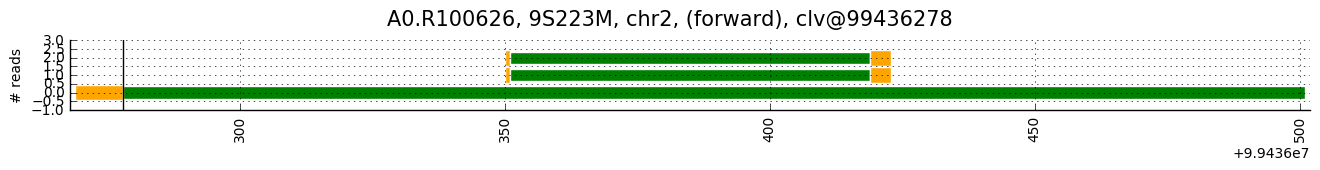

In [19]:
Image('./chr2_A0.R100626_99436278.png')